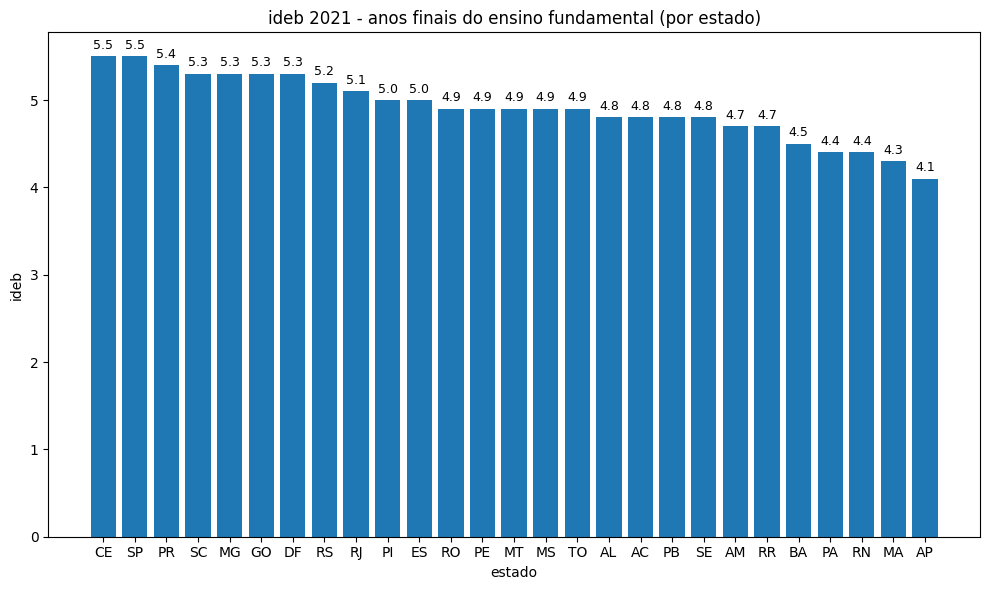

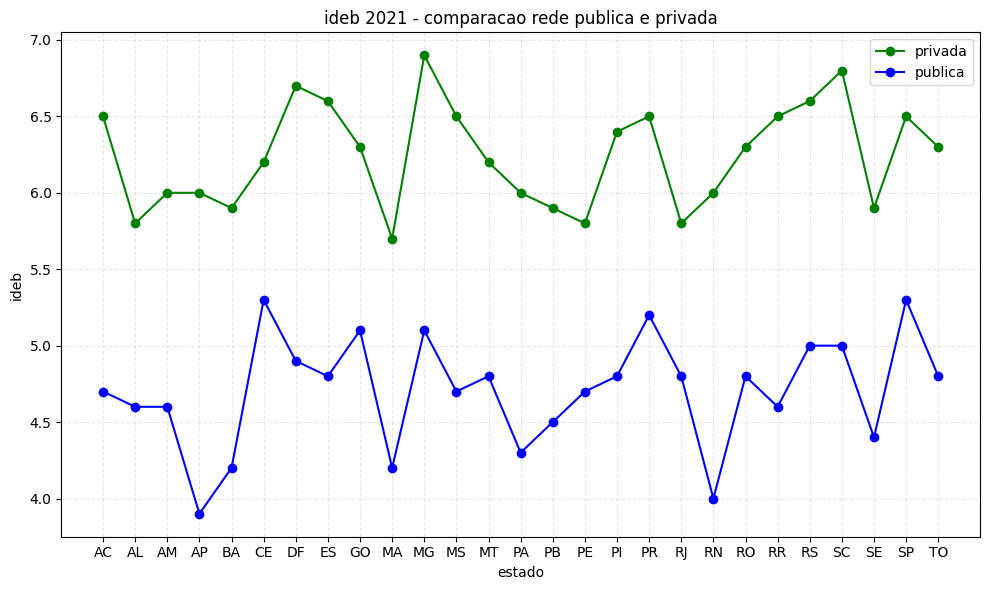

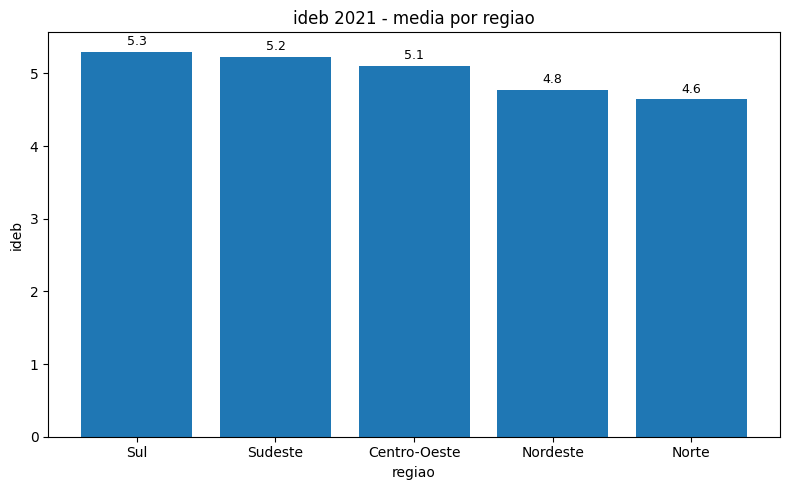

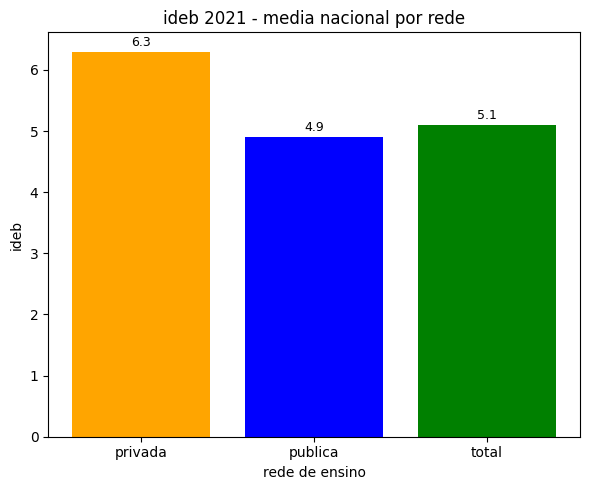

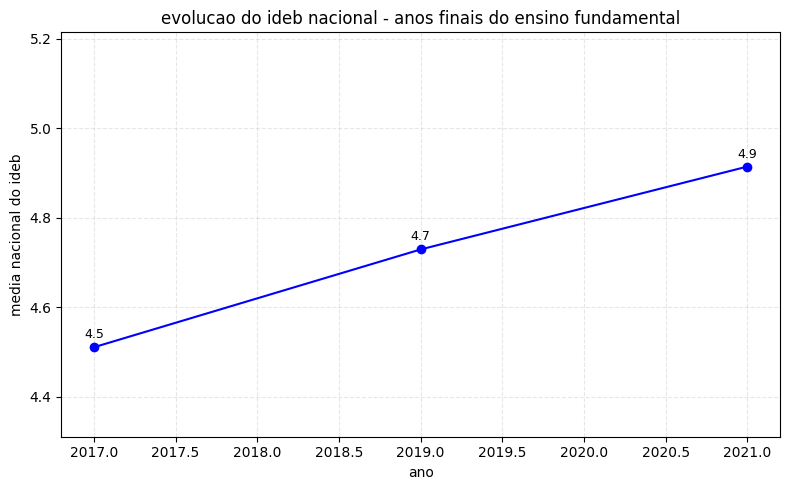

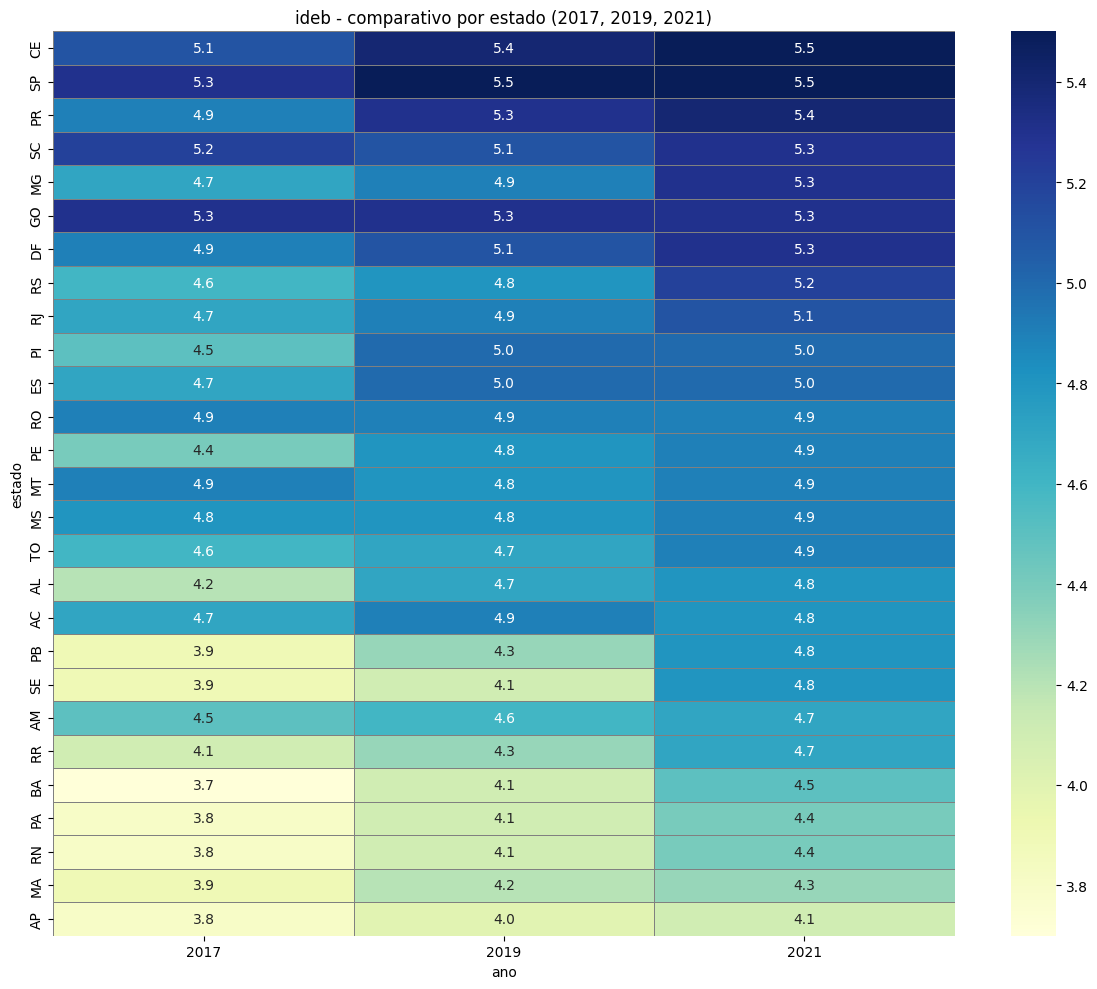

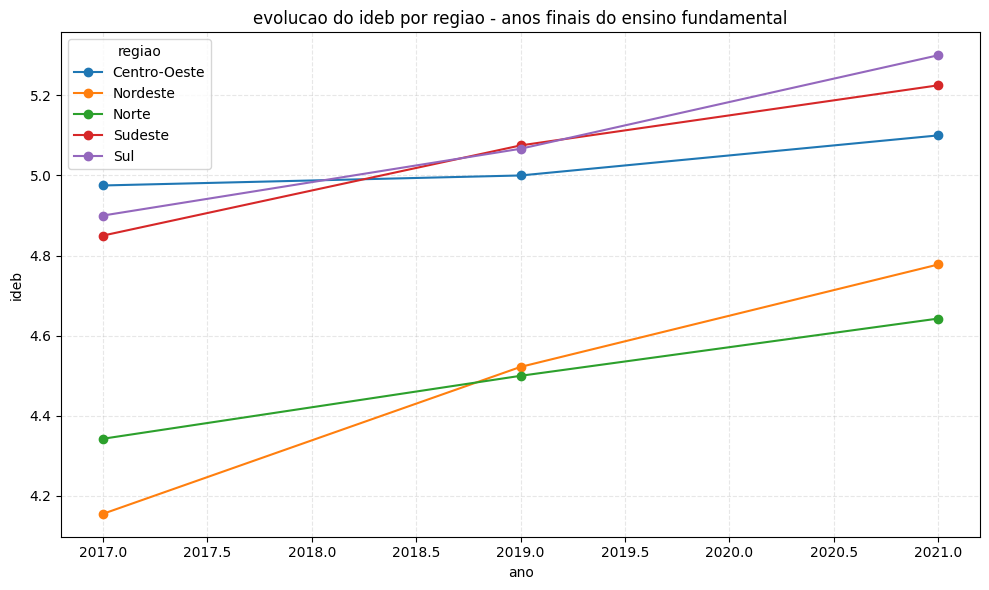

In [5]:
# --- ANOS FINAIS 2021 ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# le a aba 'estados' da planilha de 2021
df = pd.read_excel('2021/ideb_2021_anos_finais.xlsx', sheet_name='estados')

# dicionario de siglas por codigo ibge
siglas_estados = {
    11:'RO', 12:'AC', 13:'AM', 14:'RR', 15:'PA', 16:'AP', 17:'TO',
    21:'MA', 22:'PI', 23:'CE', 24:'RN', 25:'PB', 26:'PE', 27:'AL', 28:'SE', 29:'BA',
    31:'MG', 32:'ES', 33:'RJ', 35:'SP',
    41:'PR', 42:'SC', 43:'RS',
    50:'MS', 51:'MT', 52:'GO', 53:'DF'
}

regioes = {
    'Norte': ['RO','AC','AM','RR','PA','AP','TO'],
    'Nordeste': ['MA','PI','CE','RN','PB','PE','AL','SE','BA'],
    'Sudeste': ['MG','ES','RJ','SP'],
    'Sul': ['PR','SC','RS'],
    'Centro-Oeste': ['MS','MT','GO','DF']
}

def obter_regiao(sigla):
    for regiao, estados in regioes.items():
        if sigla in estados:
            return regiao
    return 'Outro'

# filtra apenas total (0) por estado
df_estado_total = df[df['dependencia_id'] == 0].copy()
df_estado_total['estado'] = df_estado_total['ibge_id'].map(siglas_estados)
df_estado_total = df_estado_total.sort_values(by='ideb', ascending=False)

# grafico de barras com ideb por estado com valores visiveis
plt.figure(figsize=(10,6))
plt.bar(df_estado_total['estado'], df_estado_total['ideb'])
for i, v in enumerate(df_estado_total['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - anos finais do ensino fundamental (por estado)')
plt.xlabel('estado')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico1.png", dpi=300, bbox_inches='tight')
plt.show()

# compara ideb publico e privado (grafico de linhas)
df_pp = df[df['dependencia_id'].isin([4,5])].copy()
df_pp['estado'] = df_pp['ibge_id'].map(siglas_estados)
df_pp = df_pp[df_pp['estado'].notnull()]
df_pp = df_pp.sort_values(by='estado')

plt.figure(figsize=(10,6))
for tipo, estilo in zip([4,5], ['green', 'blue']):
    dados = df_pp[df_pp['dependencia_id'] == tipo]
    label = 'privada' if tipo == 4 else 'publica'
    plt.plot(dados['estado'], dados['ideb'], marker='o', label=label, color=estilo)
plt.title('ideb 2021 - comparacao rede publica e privada')
plt.xlabel('estado')
plt.ylabel('ideb')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico2.png", dpi=300, bbox_inches='tight')
plt.show()

# media por regiao
df_estado_total['regiao'] = df_estado_total['estado'].apply(obter_regiao)
df_regioes = df_estado_total.groupby('regiao')[['ideb']].mean().reset_index()
df_regioes = df_regioes.sort_values(by='ideb', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(df_regioes['regiao'], df_regioes['ideb'])
for i, v in enumerate(df_regioes['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - media por regiao')
plt.xlabel('regiao')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico3.png", dpi=300, bbox_inches='tight')
plt.show()

# le a aba 'brasil' da planilha
df_brasil = pd.read_excel('2021/ideb_2021_anos_finais.xlsx', sheet_name='brasil')
df_brasil_nacional = df_brasil[df_brasil['dependencia_id'].isin([0, 4, 5])].copy()
rotulos = {0: 'total', 4: 'privada', 5: 'publica'}
df_brasil_nacional['categoria'] = df_brasil_nacional['dependencia_id'].map(rotulos)
df_brasil_nacional = df_brasil_nacional.sort_values(by='categoria')

colors = ['orange', 'blue', 'green']
plt.figure(figsize=(6,5))
plt.bar(df_brasil_nacional['categoria'], df_brasil_nacional['ideb'], color=colors)
for i, v in enumerate(df_brasil_nacional['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - media nacional por rede')
plt.xlabel('rede de ensino')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico4.png", dpi=300, bbox_inches='tight')
plt.show()

# evolucao do ideb nacional
anos = [2017, 2019, 2021]
medias_nacionais = []

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_anos_finais.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0]
    media = df_total['ideb'].mean()
    medias_nacionais.append(media)

plt.figure(figsize=(8,5))
plt.plot(anos, medias_nacionais, marker='o', linestyle='-', color='blue')
for i, v in enumerate(medias_nacionais):
    plt.text(anos[i], v + 0.02, f'{v:.1f}', ha='center', fontsize=9)  # valor mais próximo da linha
plt.title('evolucao do ideb nacional - anos finais do ensino fundamental')
plt.xlabel('ano')
plt.ylabel('media nacional do ideb')
plt.ylim(min(medias_nacionais) - 0.2, max(medias_nacionais) + 0.3)  # ajusta limites do eixo Y
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico5.png", dpi=300, bbox_inches='tight')
plt.show()

# comparacao por estado entre os anos
dados_por_estado = {}

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_anos_finais.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0].copy()
    df_total['estado'] = df_total['ibge_id'].map(siglas_estados)
    df_total = df_total[df_total['estado'].notnull()]
    for _, row in df_total.iterrows():
        estado = row['estado']
        ideb = row['ideb']
        if estado not in dados_por_estado:
            dados_por_estado[estado] = {}
        dados_por_estado[estado][ano] = ideb

df_comparativo = pd.DataFrame(dados_por_estado).T[anos]
df_comparativo = df_comparativo.sort_values(by=2021, ascending=False)

# heatmap dos estados
plt.figure(figsize=(12,10))
sns.heatmap(df_comparativo, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('ideb - comparativo por estado (2017, 2019, 2021)')
plt.xlabel('ano')
plt.ylabel('estado')
plt.tight_layout()
plt.savefig("grafico20.png", dpi=300, bbox_inches='tight')
plt.show()

# evolucao por regiao (linhas)
df_regioes_todos = []

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_anos_finais.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0].copy()
    df_total['estado'] = df_total['ibge_id'].map(siglas_estados)
    df_total = df_total[df_total['estado'].notnull()]
    df_total['regiao'] = df_total['estado'].apply(obter_regiao)
    medias = df_total.groupby('regiao')[['ideb']].mean().reset_index()
    medias['ano'] = ano
    df_regioes_todos.append(medias)

df_regioes_todos = pd.concat(df_regioes_todos)

# grafico final - evolucao por regiao
plt.figure(figsize=(10,6))

for regiao in df_regioes_todos['regiao'].unique():
    dados = df_regioes_todos[df_regioes_todos['regiao'] == regiao]
    plt.plot(dados['ano'], dados['ideb'], marker='o', label=regiao)

plt.title('evolucao do ideb por regiao - anos finais do ensino fundamental')
plt.xlabel('ano')
plt.ylabel('ideb')
plt.legend(title='regiao')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico6.png", dpi=300, bbox_inches='tight')
plt.show()


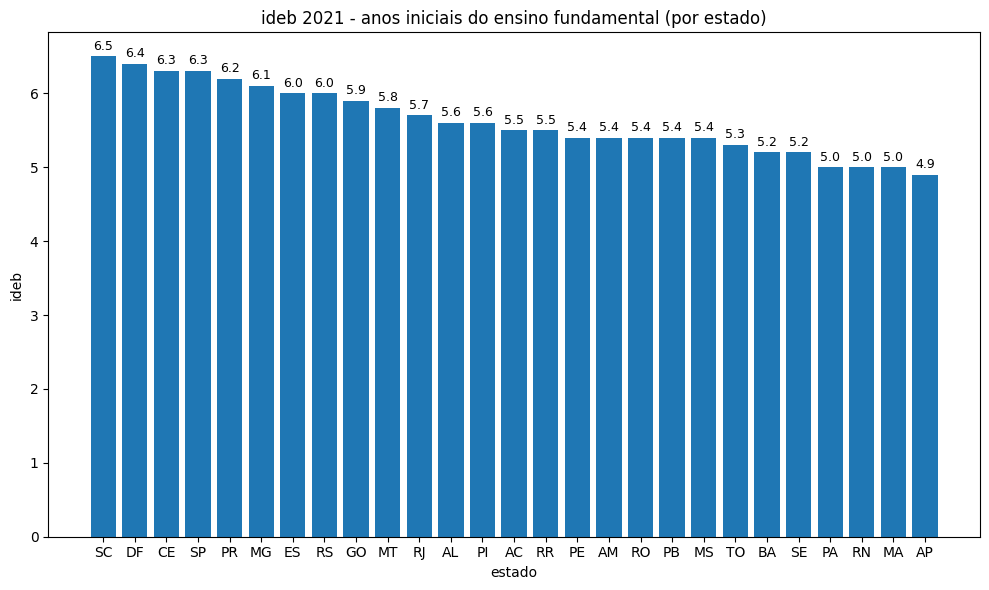

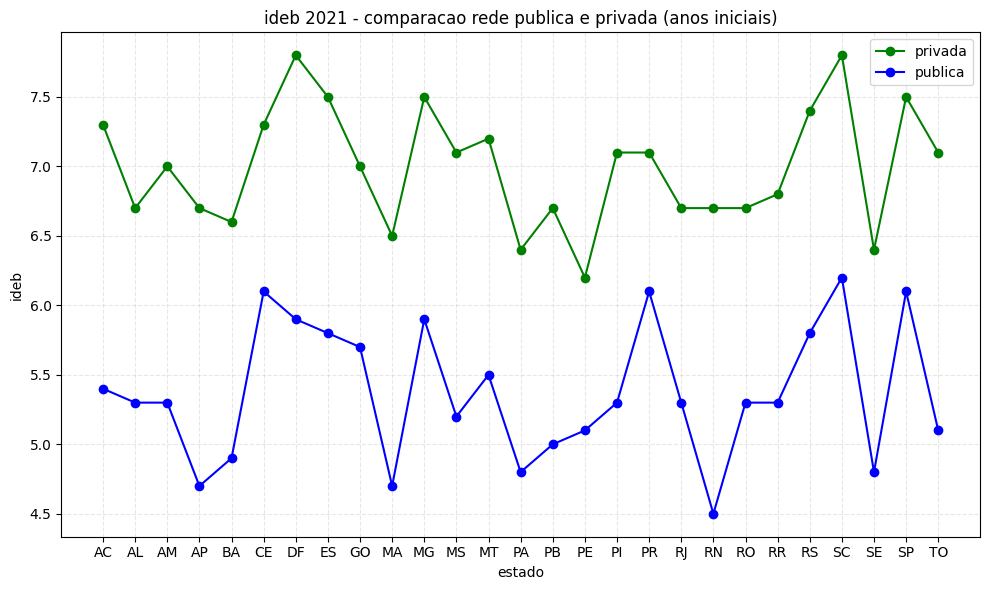

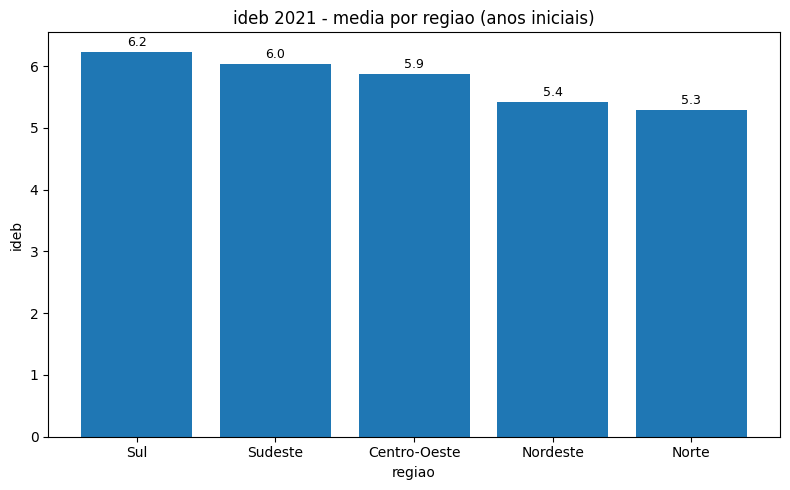

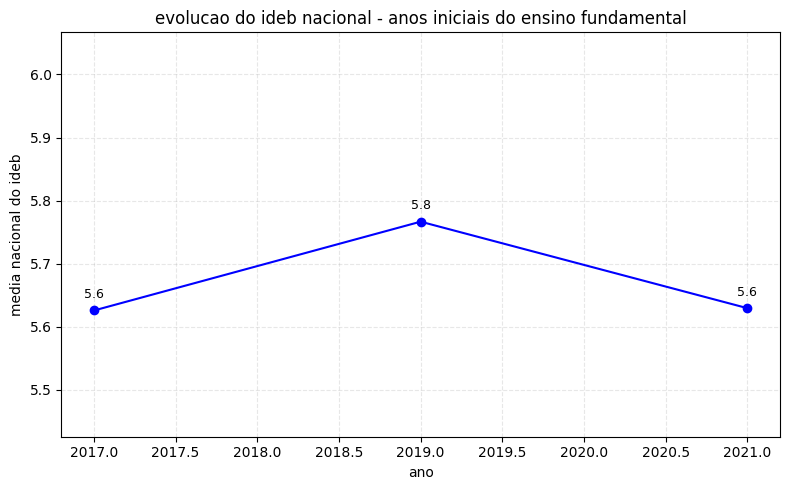

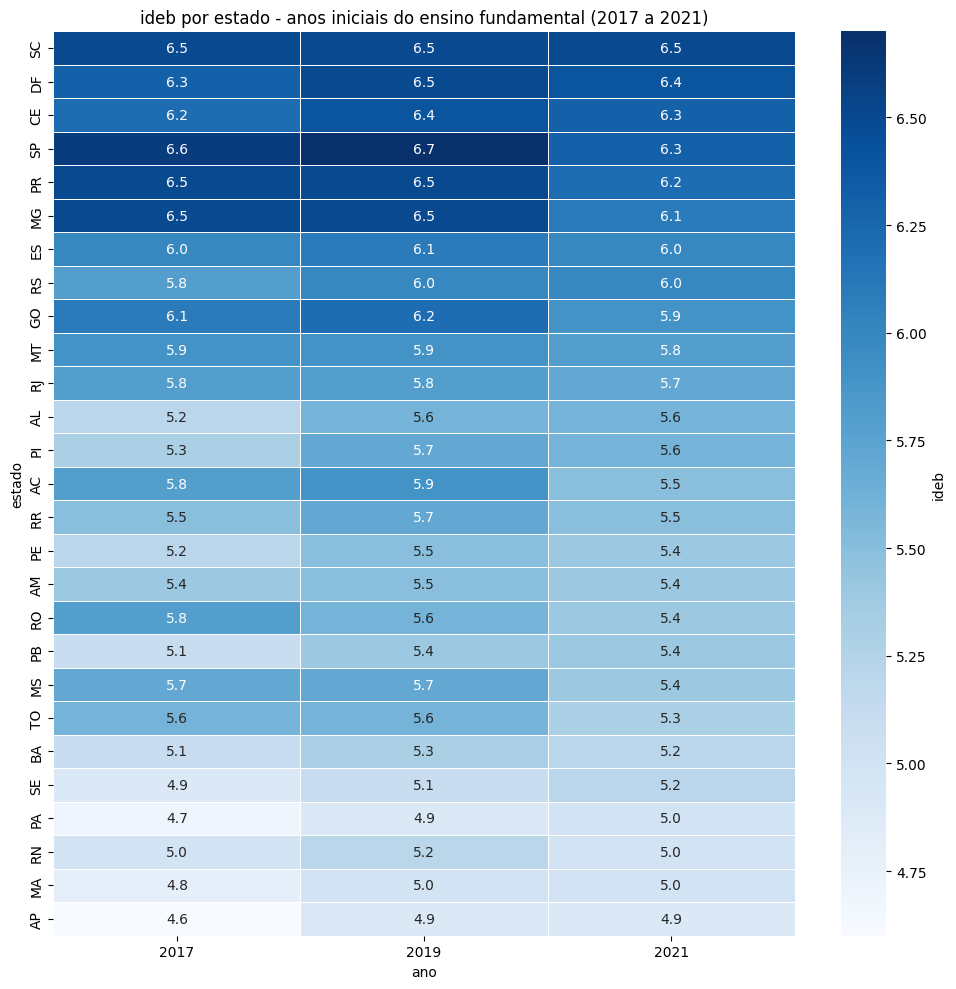

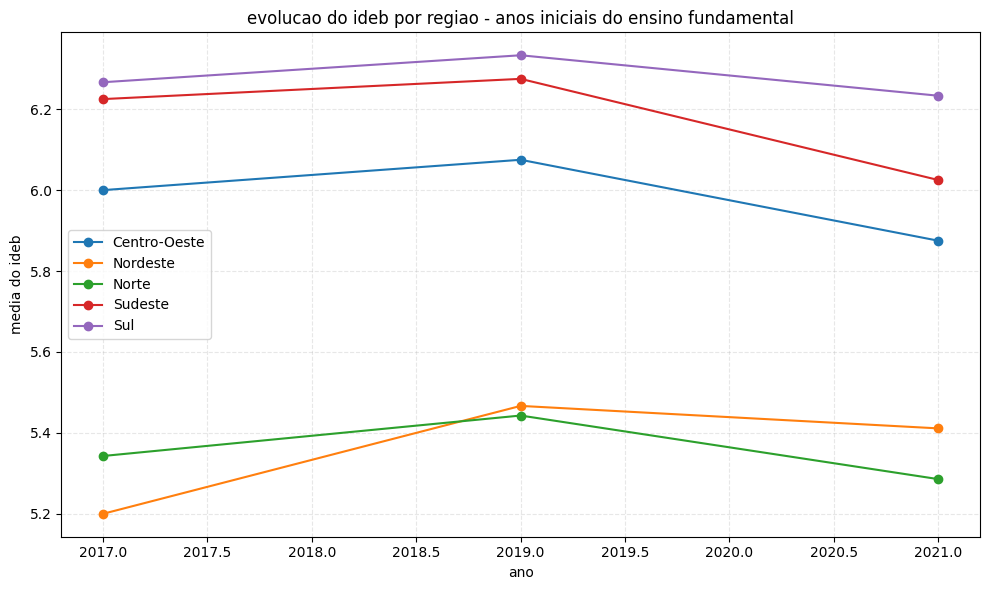

In [2]:
# --- ANOS INICIAIS 2021 ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dicionario com as siglas dos estados
siglas_estados = {
    11:'RO', 12:'AC', 13:'AM', 14:'RR', 15:'PA', 16:'AP', 17:'TO',
    21:'MA', 22:'PI', 23:'CE', 24:'RN', 25:'PB', 26:'PE', 27:'AL', 28:'SE', 29:'BA',
    31:'MG', 32:'ES', 33:'RJ', 35:'SP',
    41:'PR', 42:'SC', 43:'RS',
    50:'MS', 51:'MT', 52:'GO', 53:'DF'
}

# dicionario de regioes
regioes = {
    'Norte': ['RO','AC','AM','RR','PA','AP','TO'],
    'Nordeste': ['MA','PI','CE','RN','PB','PE','AL','SE','BA'],
    'Sudeste': ['MG','ES','RJ','SP'],
    'Sul': ['PR','SC','RS'],
    'Centro-Oeste': ['MS','MT','GO','DF']
}

def obter_regiao(sigla):
    for regiao, estados in regioes.items():
        if sigla in estados:
            return regiao
    return 'Outro'

# leitura da base de 2021
df = pd.read_excel('2021/ideb_2021_anos_iniciais.xlsx', sheet_name='estados')
df_estado_total = df[df['dependencia_id'] == 0].copy()
df_estado_total['estado'] = df_estado_total['ibge_id'].map(siglas_estados)
df_estado_total = df_estado_total.sort_values(by='ideb', ascending=False)

# grafico de barras com ideb por estado
plt.figure(figsize=(10,6))
plt.bar(df_estado_total['estado'], df_estado_total['ideb'])
for i, v in enumerate(df_estado_total['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - anos iniciais do ensino fundamental (por estado)')
plt.xlabel('estado')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico7.png", dpi=300, bbox_inches='tight')
plt.show()

# comparacao rede publica e privada
df_pp = df[df['dependencia_id'].isin([4,5])].copy()
df_pp['estado'] = df_pp['ibge_id'].map(siglas_estados)
df_pp = df_pp[df_pp['estado'].notnull()]
df_pp = df_pp.sort_values(by='estado')

plt.figure(figsize=(10,6))
for tipo, cor in zip([4,5], ['green', 'blue']):
    dados = df_pp[df_pp['dependencia_id'] == tipo]
    label = 'privada' if tipo == 4 else 'publica'
    plt.plot(dados['estado'], dados['ideb'], marker='o', label=label, color=cor)
plt.title('ideb 2021 - comparacao rede publica e privada (anos iniciais)')
plt.xlabel('estado')
plt.ylabel('ideb')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico8.png", dpi=300, bbox_inches='tight')
plt.show()

# media por regiao
df_estado_total['regiao'] = df_estado_total['estado'].apply(obter_regiao)
df_regioes = df_estado_total.groupby('regiao')[['ideb']].mean().reset_index()
df_regioes = df_regioes.sort_values(by='ideb', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(df_regioes['regiao'], df_regioes['ideb'])
for i, v in enumerate(df_regioes['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - media por regiao (anos iniciais)')
plt.xlabel('regiao')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico9.png", dpi=300, bbox_inches='tight')
plt.show()

# evolucao da media nacional
anos = [2017, 2019, 2021]
medias_nacionais = []

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_anos_iniciais.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0]
    media = df_total['ideb'].mean()
    medias_nacionais.append(media)

plt.figure(figsize=(8,5))
plt.plot(anos, medias_nacionais, marker='o', linestyle='-', color='blue')
for i, v in enumerate(medias_nacionais):
    plt.text(anos[i], v + 0.02, f'{v:.1f}', ha='center', fontsize=9)  # valor mais próximo da linha
plt.title('evolucao do ideb nacional - anos iniciais do ensino fundamental')
plt.xlabel('ano')
plt.ylabel('media nacional do ideb')
plt.ylim(min(medias_nacionais) - 0.2, max(medias_nacionais) + 0.3)  # ajusta limites do eixo Y
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico10.png", dpi=300, bbox_inches='tight')
plt.show()

# heatmap - ideb por estado (anos iniciais)
dados_ai_estado = {}

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_anos_iniciais.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0].copy()
    df_total['estado'] = df_total['ibge_id'].map(siglas_estados)
    df_total = df_total[df_total['estado'].notnull()]
    for _, row in df_total.iterrows():
        estado = row['estado']
        ideb = row['ideb']
        if estado not in dados_ai_estado:
            dados_ai_estado[estado] = {}
        dados_ai_estado[estado][ano] = ideb

df_ai_heatmap = pd.DataFrame(dados_ai_estado).T[anos]
df_ai_heatmap = df_ai_heatmap.sort_values(by=2021, ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(df_ai_heatmap, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'ideb'})
plt.title('ideb por estado - anos iniciais do ensino fundamental (2017 a 2021)')
plt.xlabel('ano')
plt.ylabel('estado')
plt.tight_layout()
plt.savefig("grafico11.png", dpi=300, bbox_inches='tight')
plt.show()

# evolucao por regiao - anos iniciais
ideb_regioes_anos = {}

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_anos_iniciais.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0].copy()
    df_total['estado'] = df_total['ibge_id'].map(siglas_estados)
    df_total['regiao'] = df_total['estado'].apply(obter_regiao)
    medias = df_total.groupby('regiao')['ideb'].mean()
    for regiao in medias.index:
        if regiao not in ideb_regioes_anos:
            ideb_regioes_anos[regiao] = {}
        ideb_regioes_anos[regiao][ano] = medias[regiao]

df_regioes_ano = pd.DataFrame(ideb_regioes_anos).T[anos]

plt.figure(figsize=(10,6))
for regiao in df_regioes_ano.index:
    plt.plot(anos, df_regioes_ano.loc[regiao], marker='o', label=regiao)
plt.title('evolucao do ideb por regiao - anos iniciais do ensino fundamental')
plt.xlabel('ano')
plt.ylabel('media do ideb')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico12.png", dpi=300, bbox_inches='tight')
plt.show()



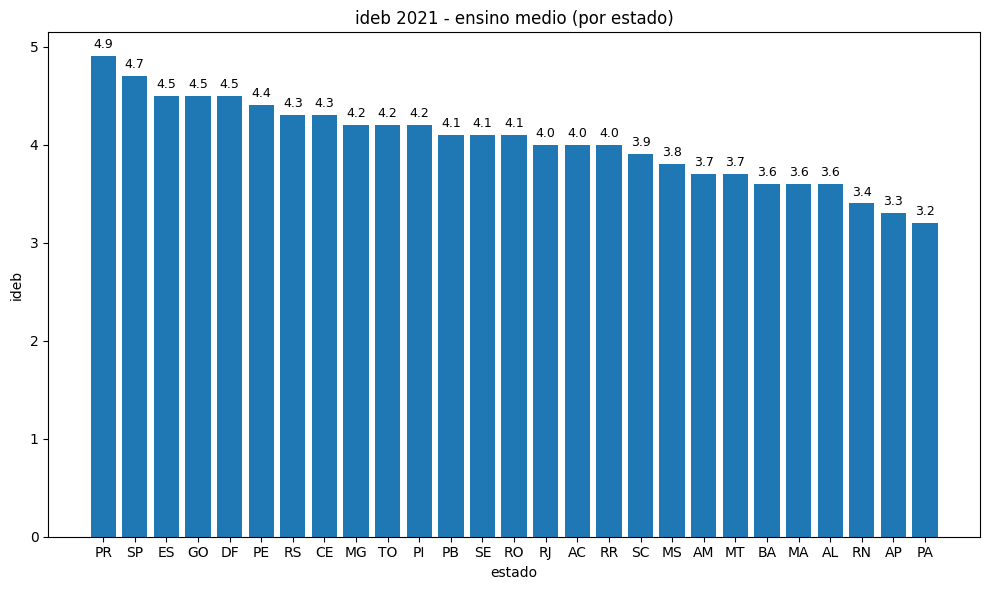

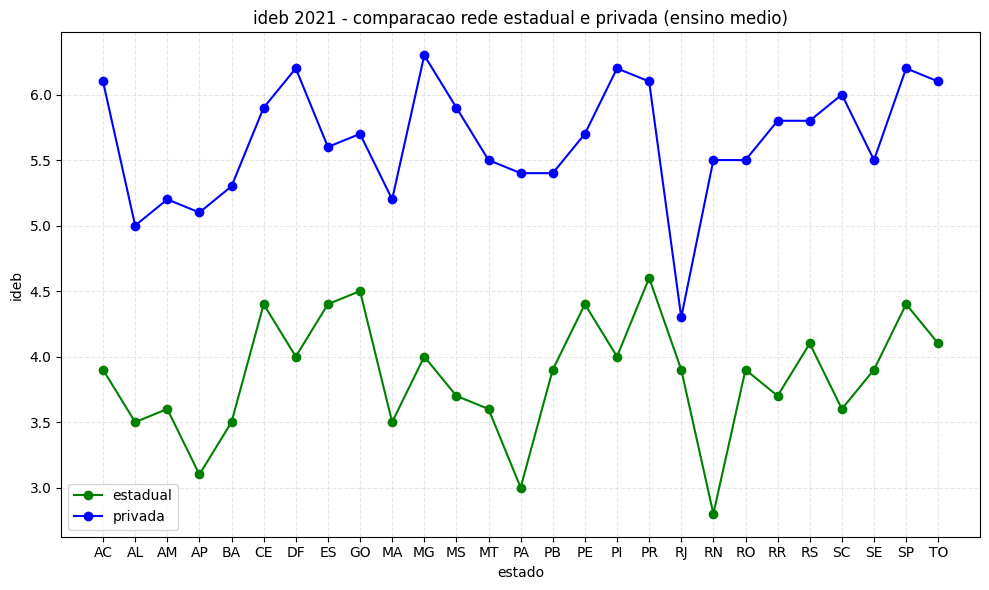

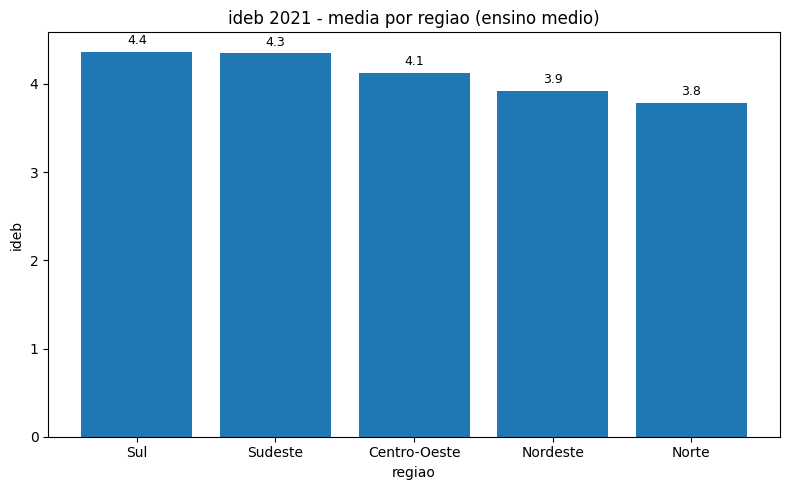

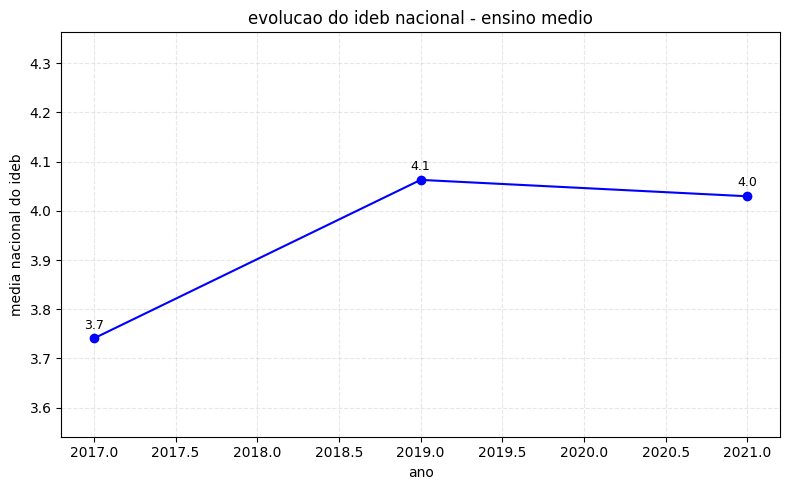

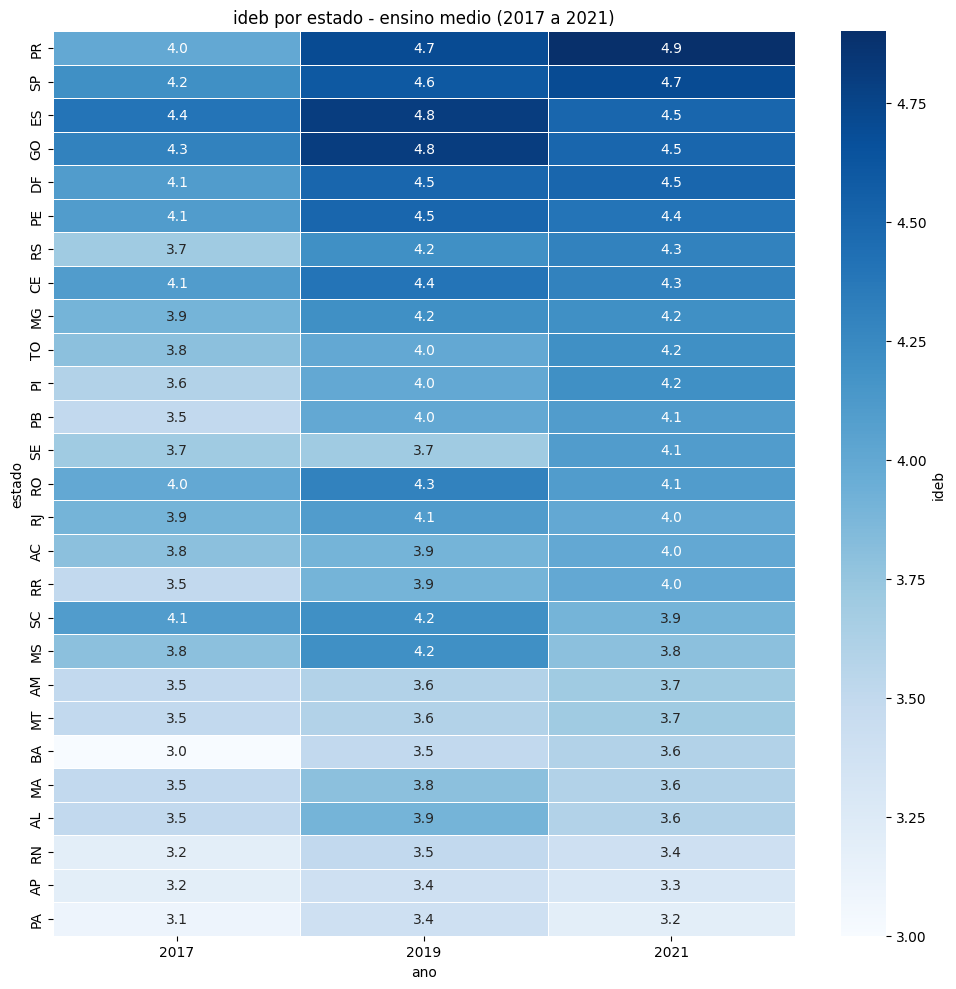

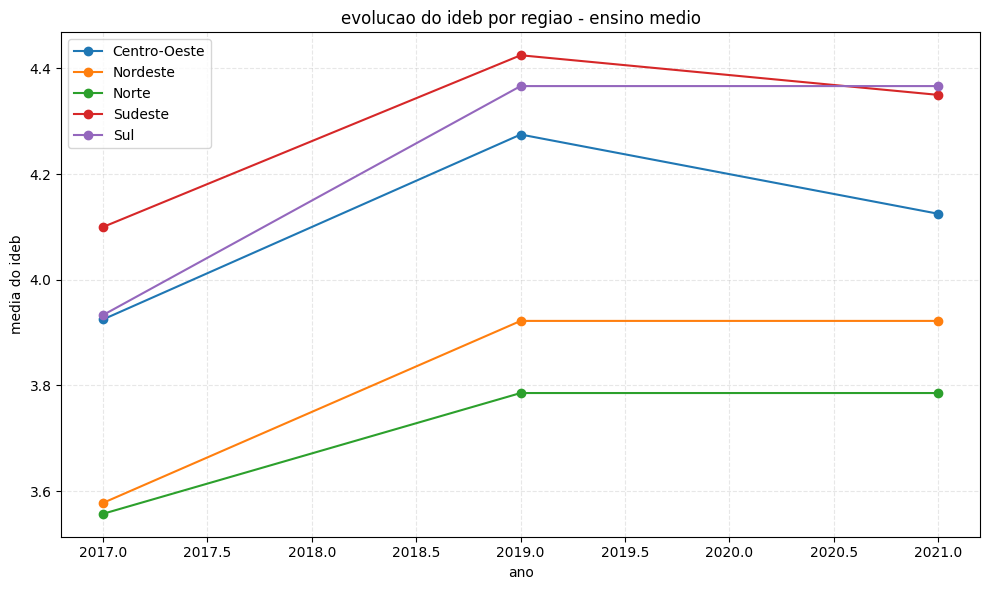

In [3]:
# --- ENSINO MÉDIO 2021 ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dicionario com as siglas dos estados
siglas_estados = {
    11:'RO', 12:'AC', 13:'AM', 14:'RR', 15:'PA', 16:'AP', 17:'TO',
    21:'MA', 22:'PI', 23:'CE', 24:'RN', 25:'PB', 26:'PE', 27:'AL', 28:'SE', 29:'BA',
    31:'MG', 32:'ES', 33:'RJ', 35:'SP',
    41:'PR', 42:'SC', 43:'RS',
    50:'MS', 51:'MT', 52:'GO', 53:'DF'
}

# dicionario de regioes
regioes = {
    'Norte': ['RO','AC','AM','RR','PA','AP','TO'],
    'Nordeste': ['MA','PI','CE','RN','PB','PE','AL','SE','BA'],
    'Sudeste': ['MG','ES','RJ','SP'],
    'Sul': ['PR','SC','RS'],
    'Centro-Oeste': ['MS','MT','GO','DF']
}

def obter_regiao(sigla):
    for regiao, estados in regioes.items():
        if sigla in estados:
            return regiao
    return 'Outro'

# leitura da base de 2021
df = pd.read_excel('2021/ideb_2021_ensino_medio.xlsx', sheet_name='estados')
df_estado_total = df[df['dependencia_id'] == 0].copy()
df_estado_total['estado'] = df_estado_total['ibge_id'].map(siglas_estados)
df_estado_total = df_estado_total.sort_values(by='ideb', ascending=False)

# grafico de barras com ideb por estado
plt.figure(figsize=(10,6))
plt.bar(df_estado_total['estado'], df_estado_total['ideb'])
for i, v in enumerate(df_estado_total['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - ensino medio (por estado)')
plt.xlabel('estado')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico13.png", dpi=300, bbox_inches='tight')
plt.show()

# compara ideb da rede estadual e privada (ensino médio)
df_ep = df[df['dependencia_id'].isin([2, 4])].copy()
df_ep['estado'] = df_ep['ibge_id'].map(siglas_estados)
df_ep = df_ep[df_ep['estado'].notnull()]
df_ep = df_ep.sort_values(by='estado')

plt.figure(figsize=(10,6))
for tipo, cor in zip([2, 4], ['green', 'blue']):
    dados = df_ep[df_ep['dependencia_id'] == tipo]
    label = 'estadual' if tipo == 2 else 'privada'
    plt.plot(dados['estado'], dados['ideb'], marker='o', label=label, color=cor)
plt.title('ideb 2021 - comparacao rede estadual e privada (ensino medio)')
plt.xlabel('estado')
plt.ylabel('ideb')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico14.png", dpi=300, bbox_inches='tight')
plt.show()

# media por regiao
df_estado_total['regiao'] = df_estado_total['estado'].apply(obter_regiao)
df_regioes = df_estado_total.groupby('regiao')[['ideb']].mean().reset_index()
df_regioes = df_regioes.sort_values(by='ideb', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(df_regioes['regiao'], df_regioes['ideb'])
for i, v in enumerate(df_regioes['ideb']):
    plt.text(i, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
plt.title('ideb 2021 - media por regiao (ensino medio)')
plt.xlabel('regiao')
plt.ylabel('ideb')
plt.tight_layout()
plt.savefig("grafico15.png", dpi=300, bbox_inches='tight')
plt.show()

# evolucao da media nacional
anos = [2017, 2019, 2021]
medias_nacionais = []

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_ensino_medio.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0]
    media = df_total['ideb'].mean()
    medias_nacionais.append(media)

plt.figure(figsize=(8,5))
plt.plot(anos, medias_nacionais, marker='o', linestyle='-', color='blue')
for i, v in enumerate(medias_nacionais):
    plt.text(anos[i], v + 0.02, f'{v:.1f}', ha='center', fontsize=9)
plt.title('evolucao do ideb nacional - ensino medio')
plt.xlabel('ano')
plt.ylabel('media nacional do ideb')
plt.ylim(min(medias_nacionais) - 0.2, max(medias_nacionais) + 0.3)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico16.png", dpi=300, bbox_inches='tight')
plt.show()

# heatmap - ideb por estado (ensino medio)
dados_em_estado = {}

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_ensino_medio.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0].copy()
    df_total['estado'] = df_total['ibge_id'].map(siglas_estados)
    df_total = df_total[df_total['estado'].notnull()]
    for _, row in df_total.iterrows():
        estado = row['estado']
        ideb = row['ideb']
        if estado not in dados_em_estado:
            dados_em_estado[estado] = {}
        dados_em_estado[estado][ano] = ideb

df_em_heatmap = pd.DataFrame(dados_em_estado).T[anos]
df_em_heatmap = df_em_heatmap.sort_values(by=2021, ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(df_em_heatmap, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'ideb'})
plt.title('ideb por estado - ensino medio (2017 a 2021)')
plt.xlabel('ano')
plt.ylabel('estado')
plt.tight_layout()
plt.savefig("grafico17.png", dpi=300, bbox_inches='tight')
plt.show()

# evolucao por regiao - ensino medio
ideb_regioes_anos = {}

for ano in anos:
    caminho = f'{ano}/ideb_{ano}_ensino_medio.xlsx'
    df = pd.read_excel(caminho, sheet_name='estados')
    df_total = df[df['dependencia_id'] == 0].copy()
    df_total['estado'] = df_total['ibge_id'].map(siglas_estados)
    df_total['regiao'] = df_total['estado'].apply(obter_regiao)
    medias = df_total.groupby('regiao')['ideb'].mean()
    for regiao in medias.index:
        if regiao not in ideb_regioes_anos:
            ideb_regioes_anos[regiao] = {}
        ideb_regioes_anos[regiao][ano] = medias[regiao]

df_regioes_ano = pd.DataFrame(ideb_regioes_anos).T[anos]

plt.figure(figsize=(10,6))
for regiao in df_regioes_ano.index:
    plt.plot(anos, df_regioes_ano.loc[regiao], marker='o', label=regiao)
plt.title('evolucao do ideb por regiao - ensino medio')
plt.xlabel('ano')
plt.ylabel('media do ideb')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("grafico18.png", dpi=300, bbox_inches='tight')
plt.show()
